<a href="https://colab.research.google.com/github/farazjawedd/Explainable-AI/blob/main/xAI_Assignment_4_Explainable_Techniques_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIPI 590 - XAI | Assignment #04
### Faraz Jawed (fj49)


In [1]:
!pip install alibi
!pip install pycebox

  Using cached pycebox-0.0.1-py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay ,partial_dependence
from alibi.explainers import ALE, plot_ale
from pycebox.ice import ice, ice_plot

## Loading the Dataset

In [3]:
data_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(data_url)

#### Dataset Overview

The analysis uses the Medical Insurance Cost dataset, which contains information about insurance charges based on various demographic and health-related features including age, BMI, number of children, smoking status, and region.

#### Model Implementation

A Random Forest Regressor was implemented to predict insurance charges. The model was trained on preprocessed data with one-hot encoded categorical variables (smoker status and regions) and numerical features (age, BMI, children).

### Displaying basic info about the dataset

In [4]:
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Exploratory Data Analysis (EDA)


#### Correlation between independant variables

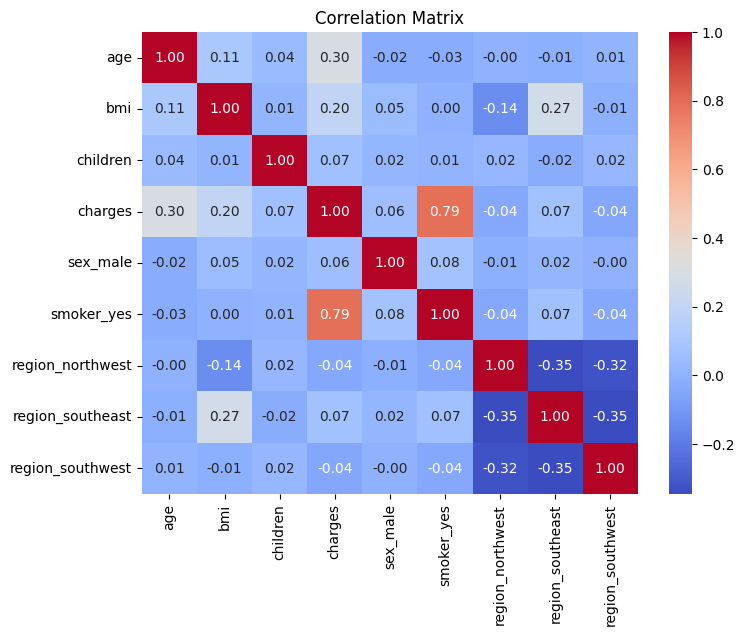

In [6]:
# Visualize correlations between numerical features
data_encoded = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(8, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#### Distribution of dependant variable (Insurance Charges)

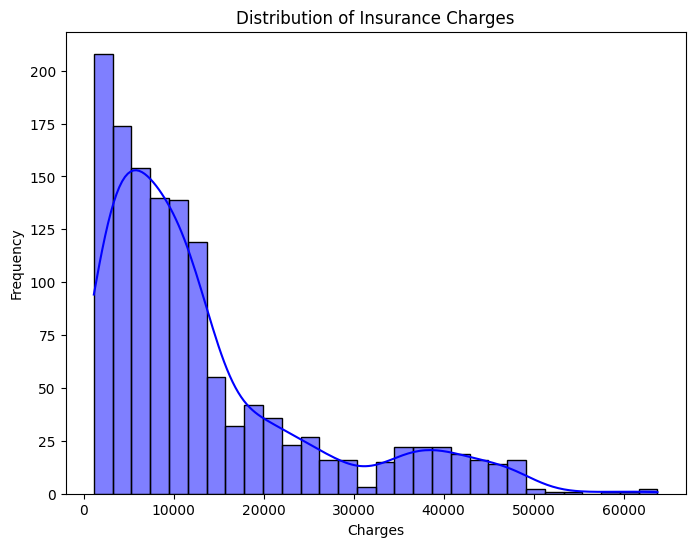

In [7]:
# Visualize distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], kde=True, bins=30, color='blue')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

### Model - Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.950,2,False,False,True,False,False
1285,47,24.320,0,False,False,False,False,False
1142,52,24.860,0,False,False,False,True,False
969,39,34.320,5,False,False,False,True,False
486,54,21.470,3,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,False,False,False,False,False
1130,39,23.870,5,False,False,False,True,False
1294,58,25.175,0,True,False,False,False,False
860,37,47.600,2,False,True,False,False,True


### PDP Plots

PDPs show the average effect of a feature on the model's predictions after accounting for all other features. It's like asking "What would happen to our predictions if we changed this one feature for everything in our dataset?" PDPs are simpler than ALE plots but can be misleading when features are correlated.

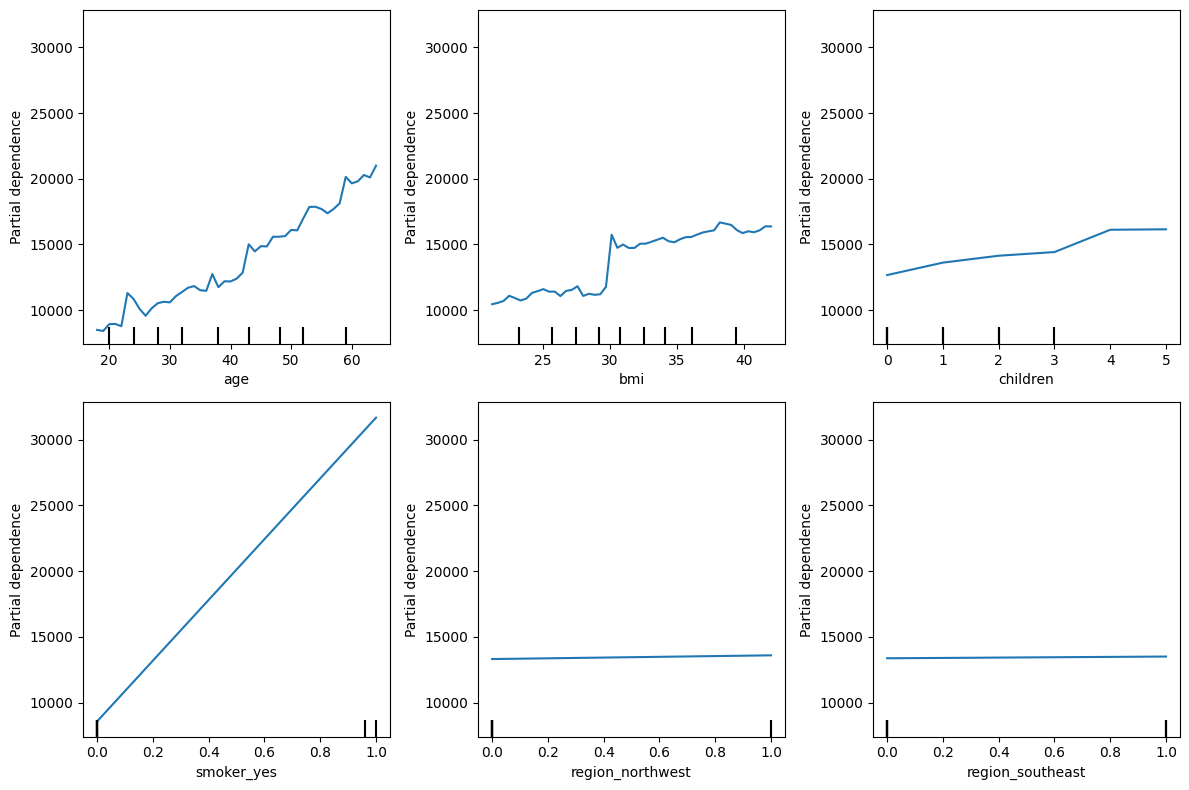

In [17]:
features = ['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast']

# Define the number of rows and columns for the plot grid
n_rows = 2
n_cols = 3

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.ravel()  # Flatten the 2D array of axes

pdp = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features,
    n_cols=n_cols,
    grid_resolution=50,
    ax=axes
)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Used AI for syntax


In [12]:
!pip install PyALE

### ALE Plots


ALE plots show how a feature affects the prediction on average, while accounting for feature interactions. The key advantage is that they're unbiased even when features are correlated. They work by calculating small "local" changes in predictions and accumulating these effects, making them more reliable than PDPs for correlated features.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

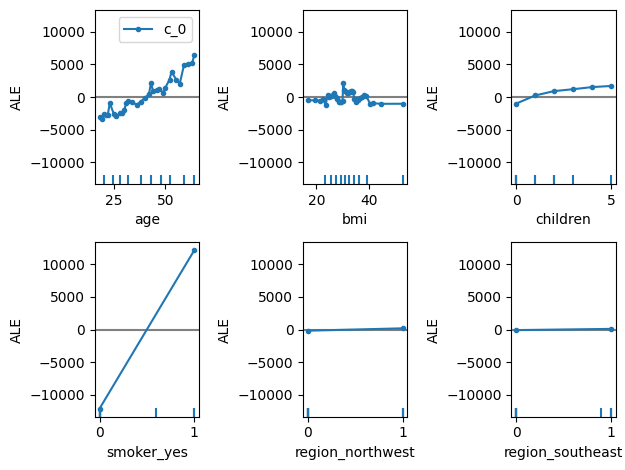

In [15]:
features = ['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast']

ale_explainer = ALE(model.predict, feature_names=X_train.columns)

ale_exp = ale_explainer.explain(X_test.values)

plot_ale(ale_exp, features=features)
plt.show()

### ICE Plots

ICE plots show how the model's predictions change for individual data points as you vary a single feature. Think of it as drawing a separate line for each data point in your dataset. This helps us spot:

- If the model's behavior is consistent across different instances
- Whether there are subgroups with different patterns
- Potential interactions between features

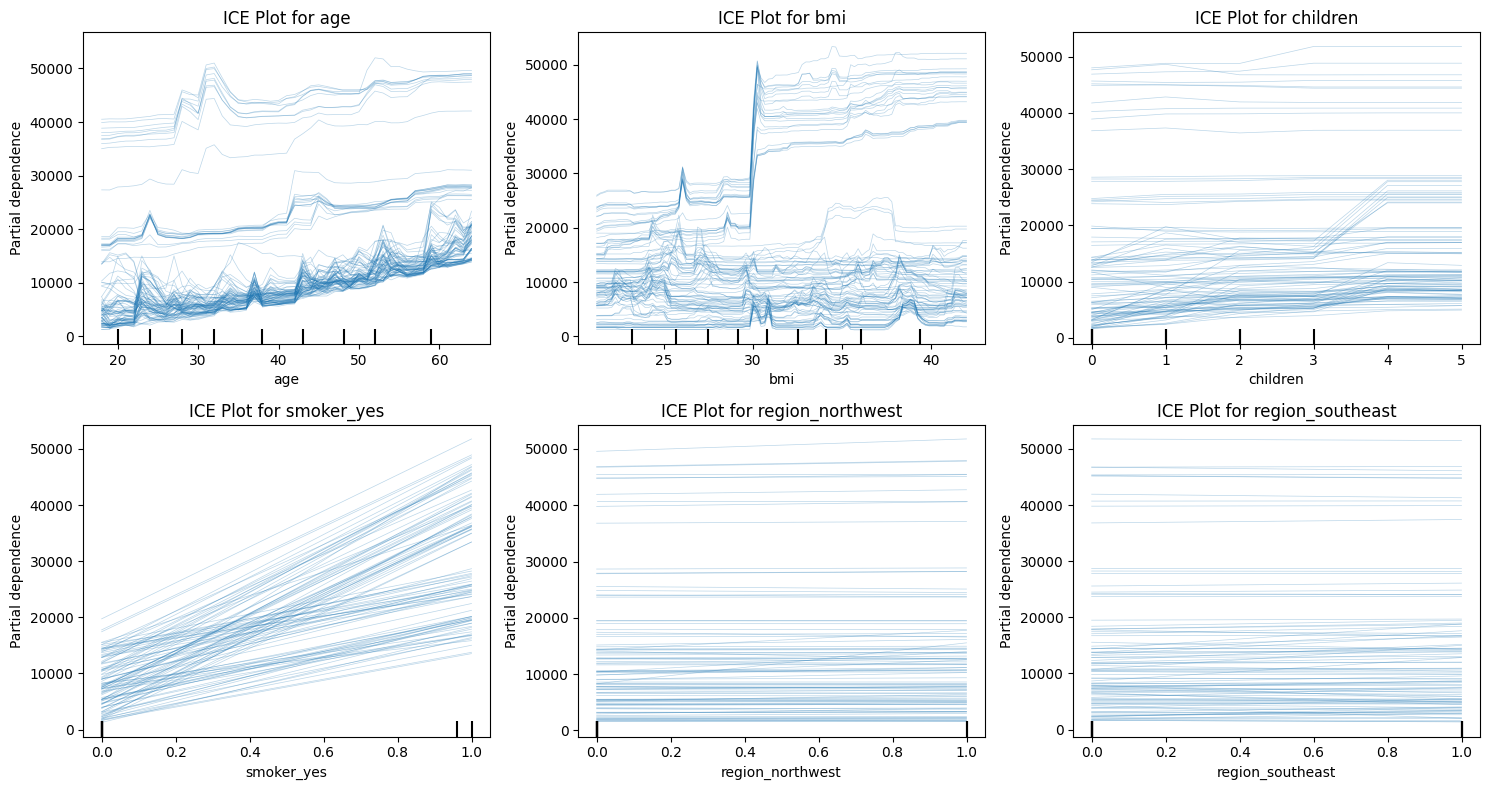

In [16]:
features = ['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast']

# Set up the plot grid
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.ravel()

# Generate ICE plots
for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(
        model,
        X_test,
        [feature],
        kind="individual",
        subsample=100,
        n_jobs=3,
        ax=axes[i],
        random_state=42
    )
    axes[i].set_title(f"ICE Plot for {feature}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature Effects and overall findings


## Population-Level Trends (PDP)
Partial Dependence Plots reveal broader patterns in the data. Age correlates with a steady increase in charges from $8,000 to $20,000 between ages 20-60. BMI demonstrates a notable threshold effect around 30-35. Smoking emerges as a major factor, potentially increasing charges by up to $25,000. The number of children shows a gentle positive correlation, while regional variations have minimal impact on overall charges.

## ALE Plot Findings
Age demonstrates an increasing impact on insurance charges, with notable variations between ages 25-50. BMI shows little influence until reaching 30, after which there's a modest uptick. Smoking status emerges as the most significant factor with a strong positive correlation. The number of children contributes to a steady increase in charges, while regional factors play only a minimal role.

## Individual Response Patterns (ICE)
The Individual Conditional Expectation plots highlight unique patterns across different demographics. Age effects vary significantly between individuals, while BMI reveals distinct threshold effects around the 30-35 range for certain cases. Smoking status maintains a consistent upward influence across all scenarios. The impact of children appears uniform across cases, shown by parallel trajectory lines. Regional differences show negligible variation in individual responses.

## Key Takeaways
Through combined analysis of ALE, ICE, and PDP methods, smoking status clearly emerges as the primary driver of insurance charges, followed by age and BMI as secondary factors. Regional differences play a notably small role in determining charges. This multi-method approach provides valuable insights at individual, group, and population levels.

In [18]:
# I used AI to rewrite some of the text above